<a href="https://colab.research.google.com/github/RoyMakary/Python-Projects/blob/main/Nasa_Software_defect_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competetion
---
## Description


Software defect prediction is crucial for NASA because it helps identify potential issues in spacecraft systems early in the development lifecycle. Detecting and addressing defects before deployment can prevent mission failures, ensure astronaut safety, and save costs associated with rework and maintenance. By employing predictive analytics, NASA can enhance the reliability and performance of its software systems, ultimately contributing to the success of space missions.

With 21 explanatory variables describing (almost) every aspect of software testing, this competition challenges you to identify the defect-prone modules from the non-defect-prone modules (Defect, Y).

## Evaluation


### Goal

Your job is to identify the defect-prone and non-defect-prone modules for each instance of the test dataset. For each Index in the test set, you must predict the value [0, 1] of the Defect variable.

### Metric

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

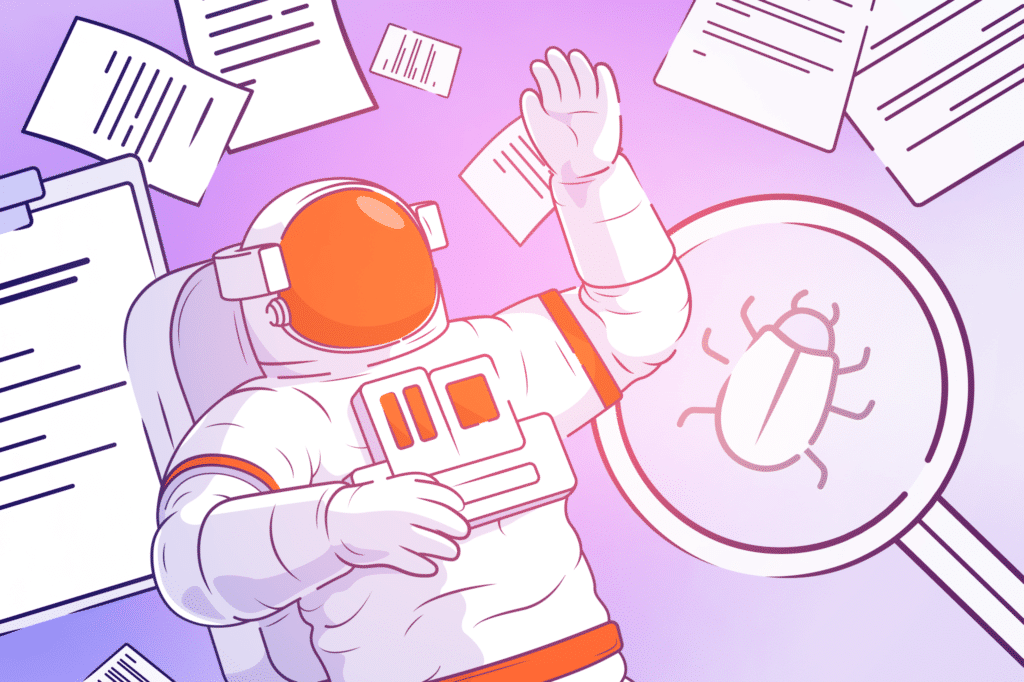

In [101]:
from IPython.display import Image, display
image_path_1 = '/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Image.png'
display(Image(filename=image_path_1))

## Nasa software defect prediction

### Let's first import the necessary libraries

In [102]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import log
import seaborn as sns
import pandas as pd
import seaborn as sns # for visuals
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na") #get rid of some warnings
warnings.filterwarnings("ignore") #get rid of some warnings

In [103]:
# Let's load the data ;)
train_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Features.csv')
train_output_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Output.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Test_Features.csv')
train_df['Defect'] = train_output_df['Defect'] # add the defect column in our training data frame

In [104]:
train_df.head()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defect
0,0,0,3,0,0,2,2,1,5,17.08,...,18,0.29,11.63,59.79,3,15,3,7,7,1
1,1,1,1,0,0,1,1,1,8,28.00,...,21,0.33,14.00,84.00,10,11,10,6,14,0
2,2,0,1,0,0,1,1,1,0,7.74,...,5,0.67,0.97,11.61,2,3,2,3,2,0
3,3,0,1,0,2,1,1,1,4,6.67,...,10,0.22,7.50,30.00,3,7,2,6,8,0
4,4,2,3,1,3,2,2,1,14,30.86,...,36,0.21,37.33,144.00,12,24,9,7,22,0


In [105]:
# Let's check the total number of columns and rows of our data set
train_df.shape

(1676, 23)

In [106]:
# Let's check if there are any missing values in our data set:
train_df.isnull().sum()

Index                    0
LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
Defect                   0
dtype: int64

In [107]:
# Great we have no missing values, let's check the number of unique values:
train_df.nunique()

Index                    1676
LOC_BLANK                  30
BRANCH_COUNT               41
LOC_CODE_AND_COMMENT       11
LOC_COMMENTS               28
CYCLOMATIC_COMPLEXITY      29
DESIGN_COMPLEXITY          24
ESSENTIAL_COMPLEXITY       19
LOC_EXECUTABLE            115
HALSTEAD_CONTENT          762
HALSTEAD_DIFFICULTY       469
HALSTEAD_EFFORT           807
HALSTEAD_ERROR_EST         88
HALSTEAD_LENGTH           259
HALSTEAD_LEVEL             50
HALSTEAD_PROG_TIME        794
HALSTEAD_VOLUME           622
NUM_OPERANDS              146
NUM_OPERATORS             193
NUM_UNIQUE_OPERANDS        70
NUM_UNIQUE_OPERATORS       33
LOC_TOTAL                 131
Defect                      2
dtype: int64

In [108]:
# Let's check the type of each feature:
train_df.dtypes

Index                      int64
LOC_BLANK                  int64
BRANCH_COUNT               int64
LOC_CODE_AND_COMMENT       int64
LOC_COMMENTS               int64
CYCLOMATIC_COMPLEXITY      int64
DESIGN_COMPLEXITY          int64
ESSENTIAL_COMPLEXITY       int64
LOC_EXECUTABLE             int64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY      float64
HALSTEAD_EFFORT          float64
HALSTEAD_ERROR_EST       float64
HALSTEAD_LENGTH            int64
HALSTEAD_LEVEL           float64
HALSTEAD_PROG_TIME       float64
HALSTEAD_VOLUME          float64
NUM_OPERANDS               int64
NUM_OPERATORS              int64
NUM_UNIQUE_OPERANDS        int64
NUM_UNIQUE_OPERATORS       int64
LOC_TOTAL                  int64
Defect                     int64
dtype: object

In [109]:
# Let's get the usual mathematical characteristics of our data:
train_df.describe()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defect
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,837.500000,1.801313,4.766706,0.124702,0.939141,2.887232,2.594869,1.701074,14.931384,21.696814,...,51.071599,0.318461,301.096223,266.368329,19.255370,31.816229,9.770883,7.754773,20.713007,0.155131
std,483.963842,3.791021,7.998350,0.690636,3.144651,4.001469,3.494295,2.240634,25.118051,21.920083,...,86.028837,0.315008,1001.372829,535.124561,32.964592,53.323039,12.485216,5.747950,30.808052,0.362138
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,418.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.800000,...,4.750000,0.080000,0.670000,9.500000,1.000000,3.000000,1.000000,3.000000,4.000000,0.000000
50%,837.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,14.565000,...,17.000000,0.200000,12.710000,59.500000,6.000000,10.000000,5.000000,6.000000,9.000000,0.000000
75%,1256.250000,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,17.000000,30.090000,...,58.000000,0.500000,127.090000,267.795000,22.000000,36.000000,14.000000,11.000000,24.000000,0.000000
max,1675.000000,35.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,...,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.000000,120.000000,37.000000,288.000000,1.000000


## Visualization

Let's visualize the data before applying any data correction:

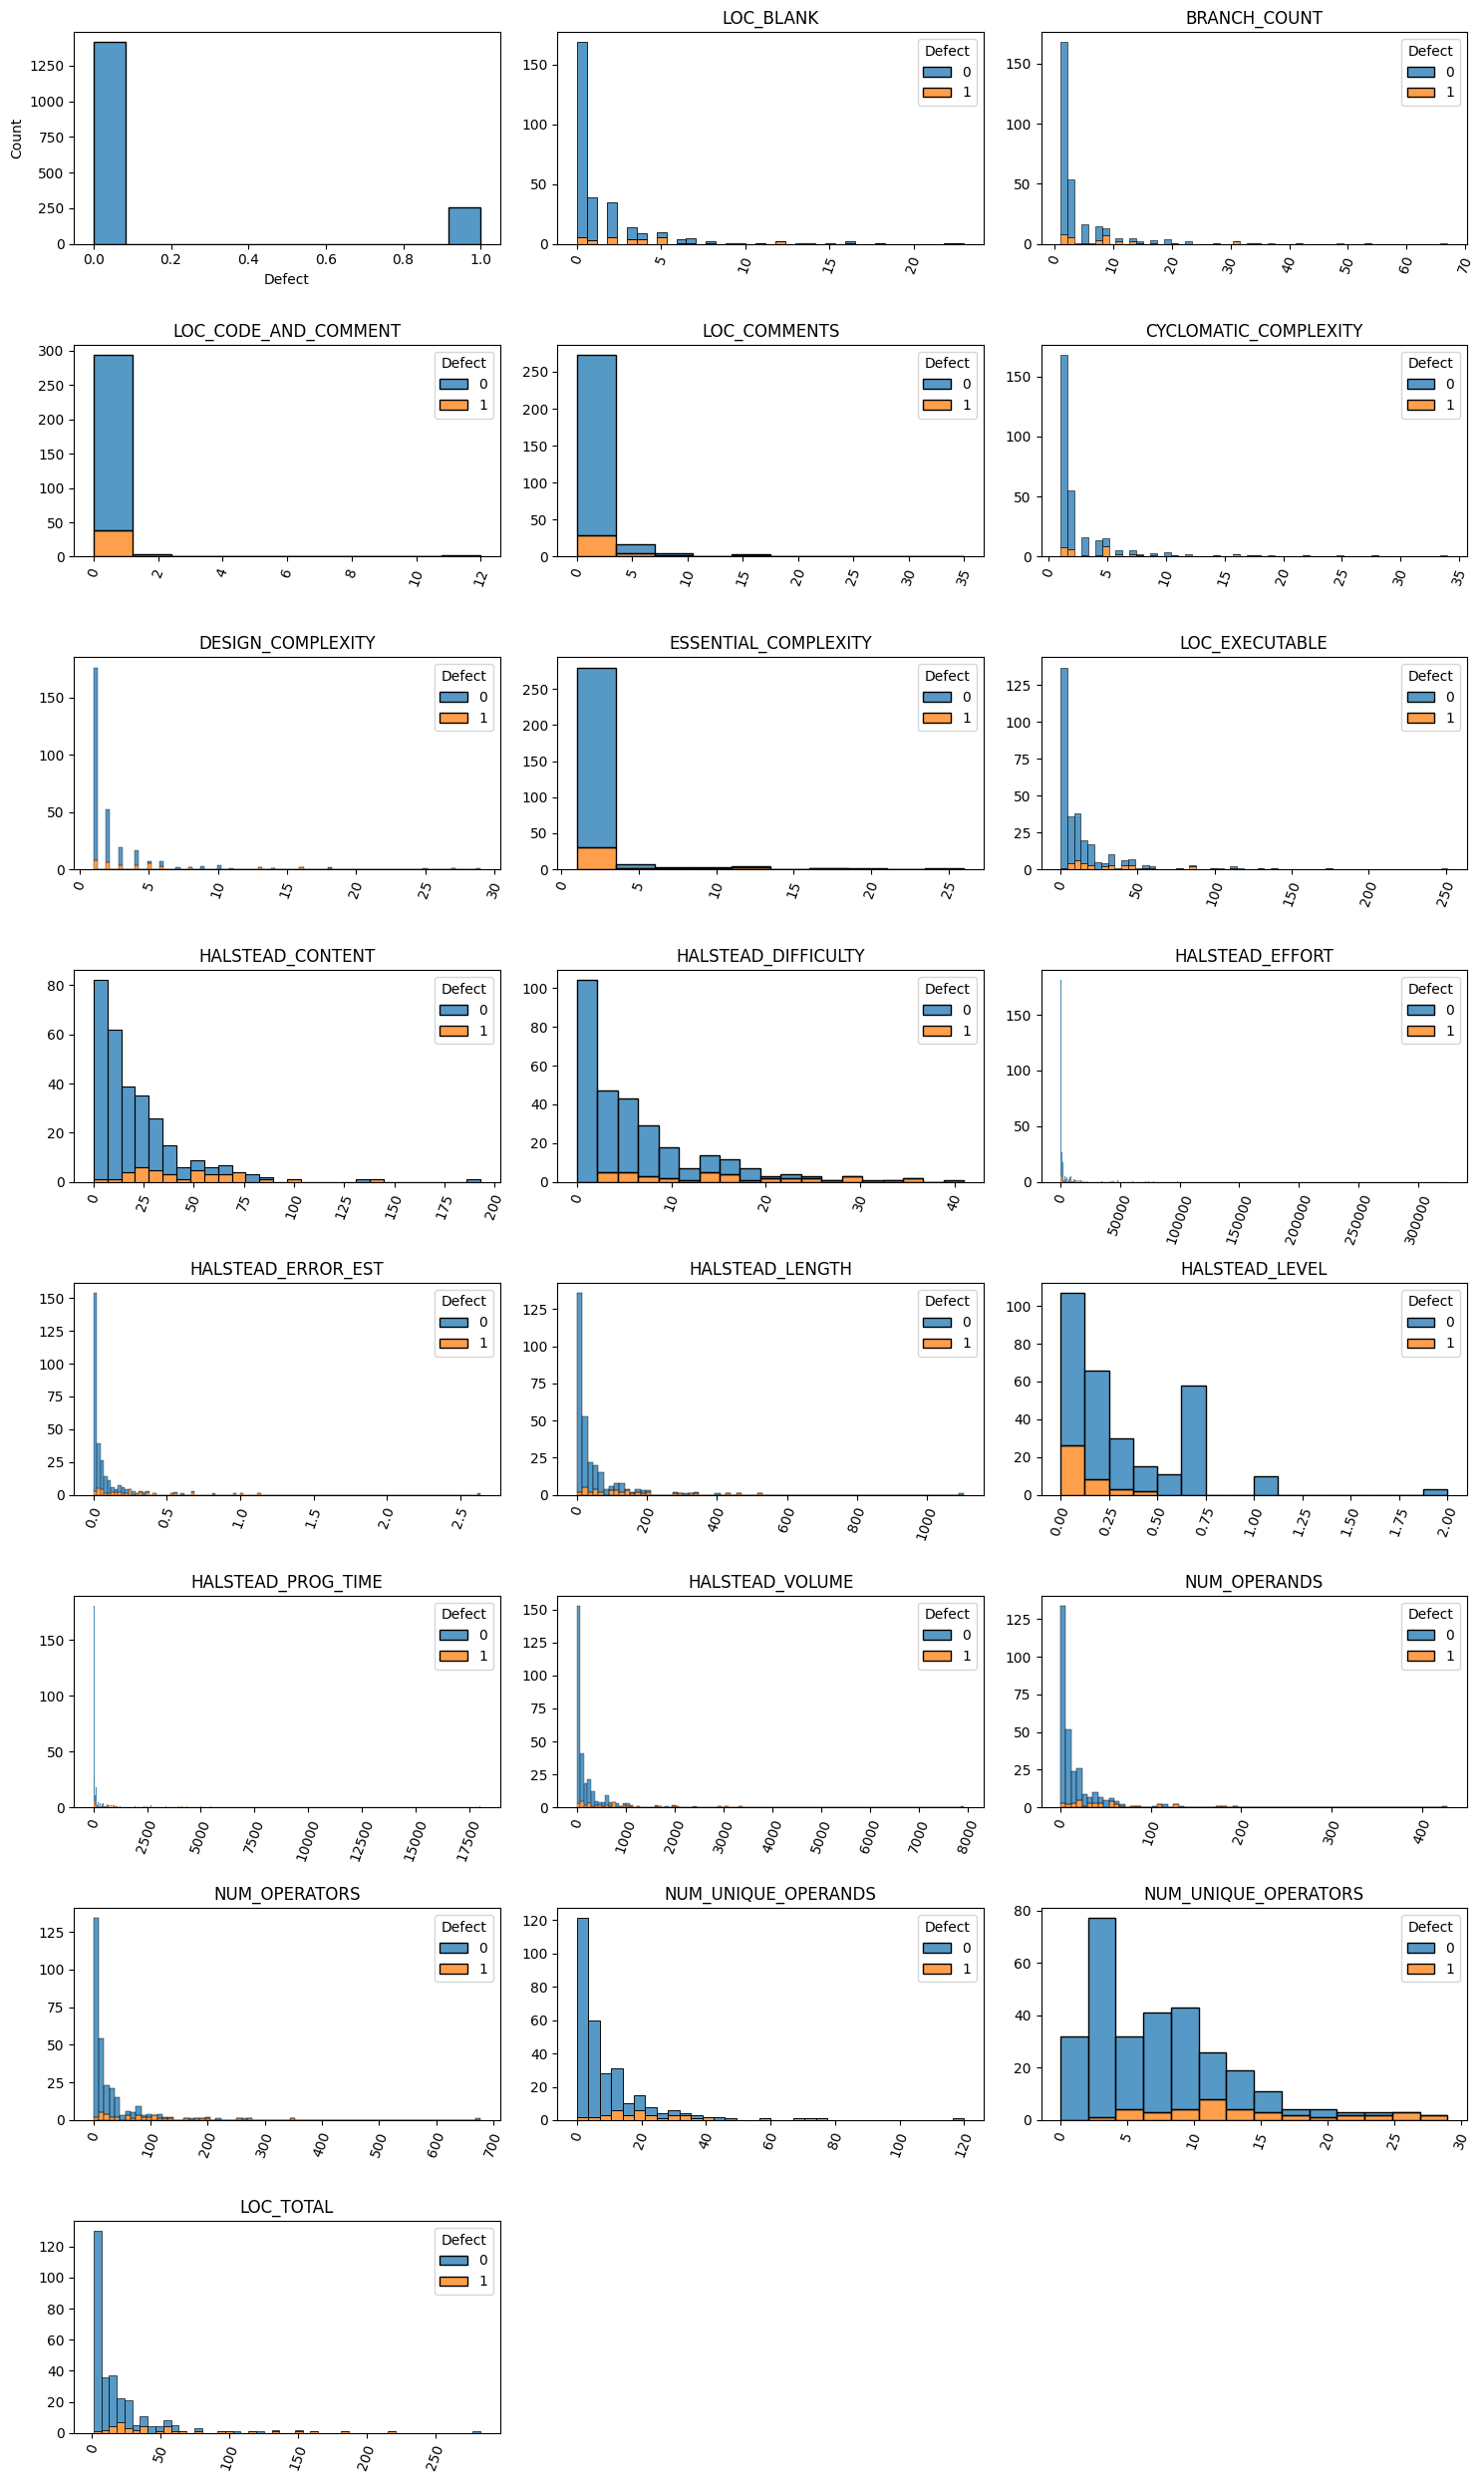

In [110]:
plt.figure(figsize=(15,25))

discrete_columns=train_df.columns

plt.subplot(8,3,1)
sns.histplot(data=train_df,x='Defect')
for i, column in enumerate(discrete_columns):
    if column!='Index' and column!='Defect':
        plt.subplot(8,3, i+1)
        sns.histplot(data=train_df[0:300],x=column,hue='Defect',multiple="stack")
        plt.title(column)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=70)


plt.tight_layout()
plt.show()

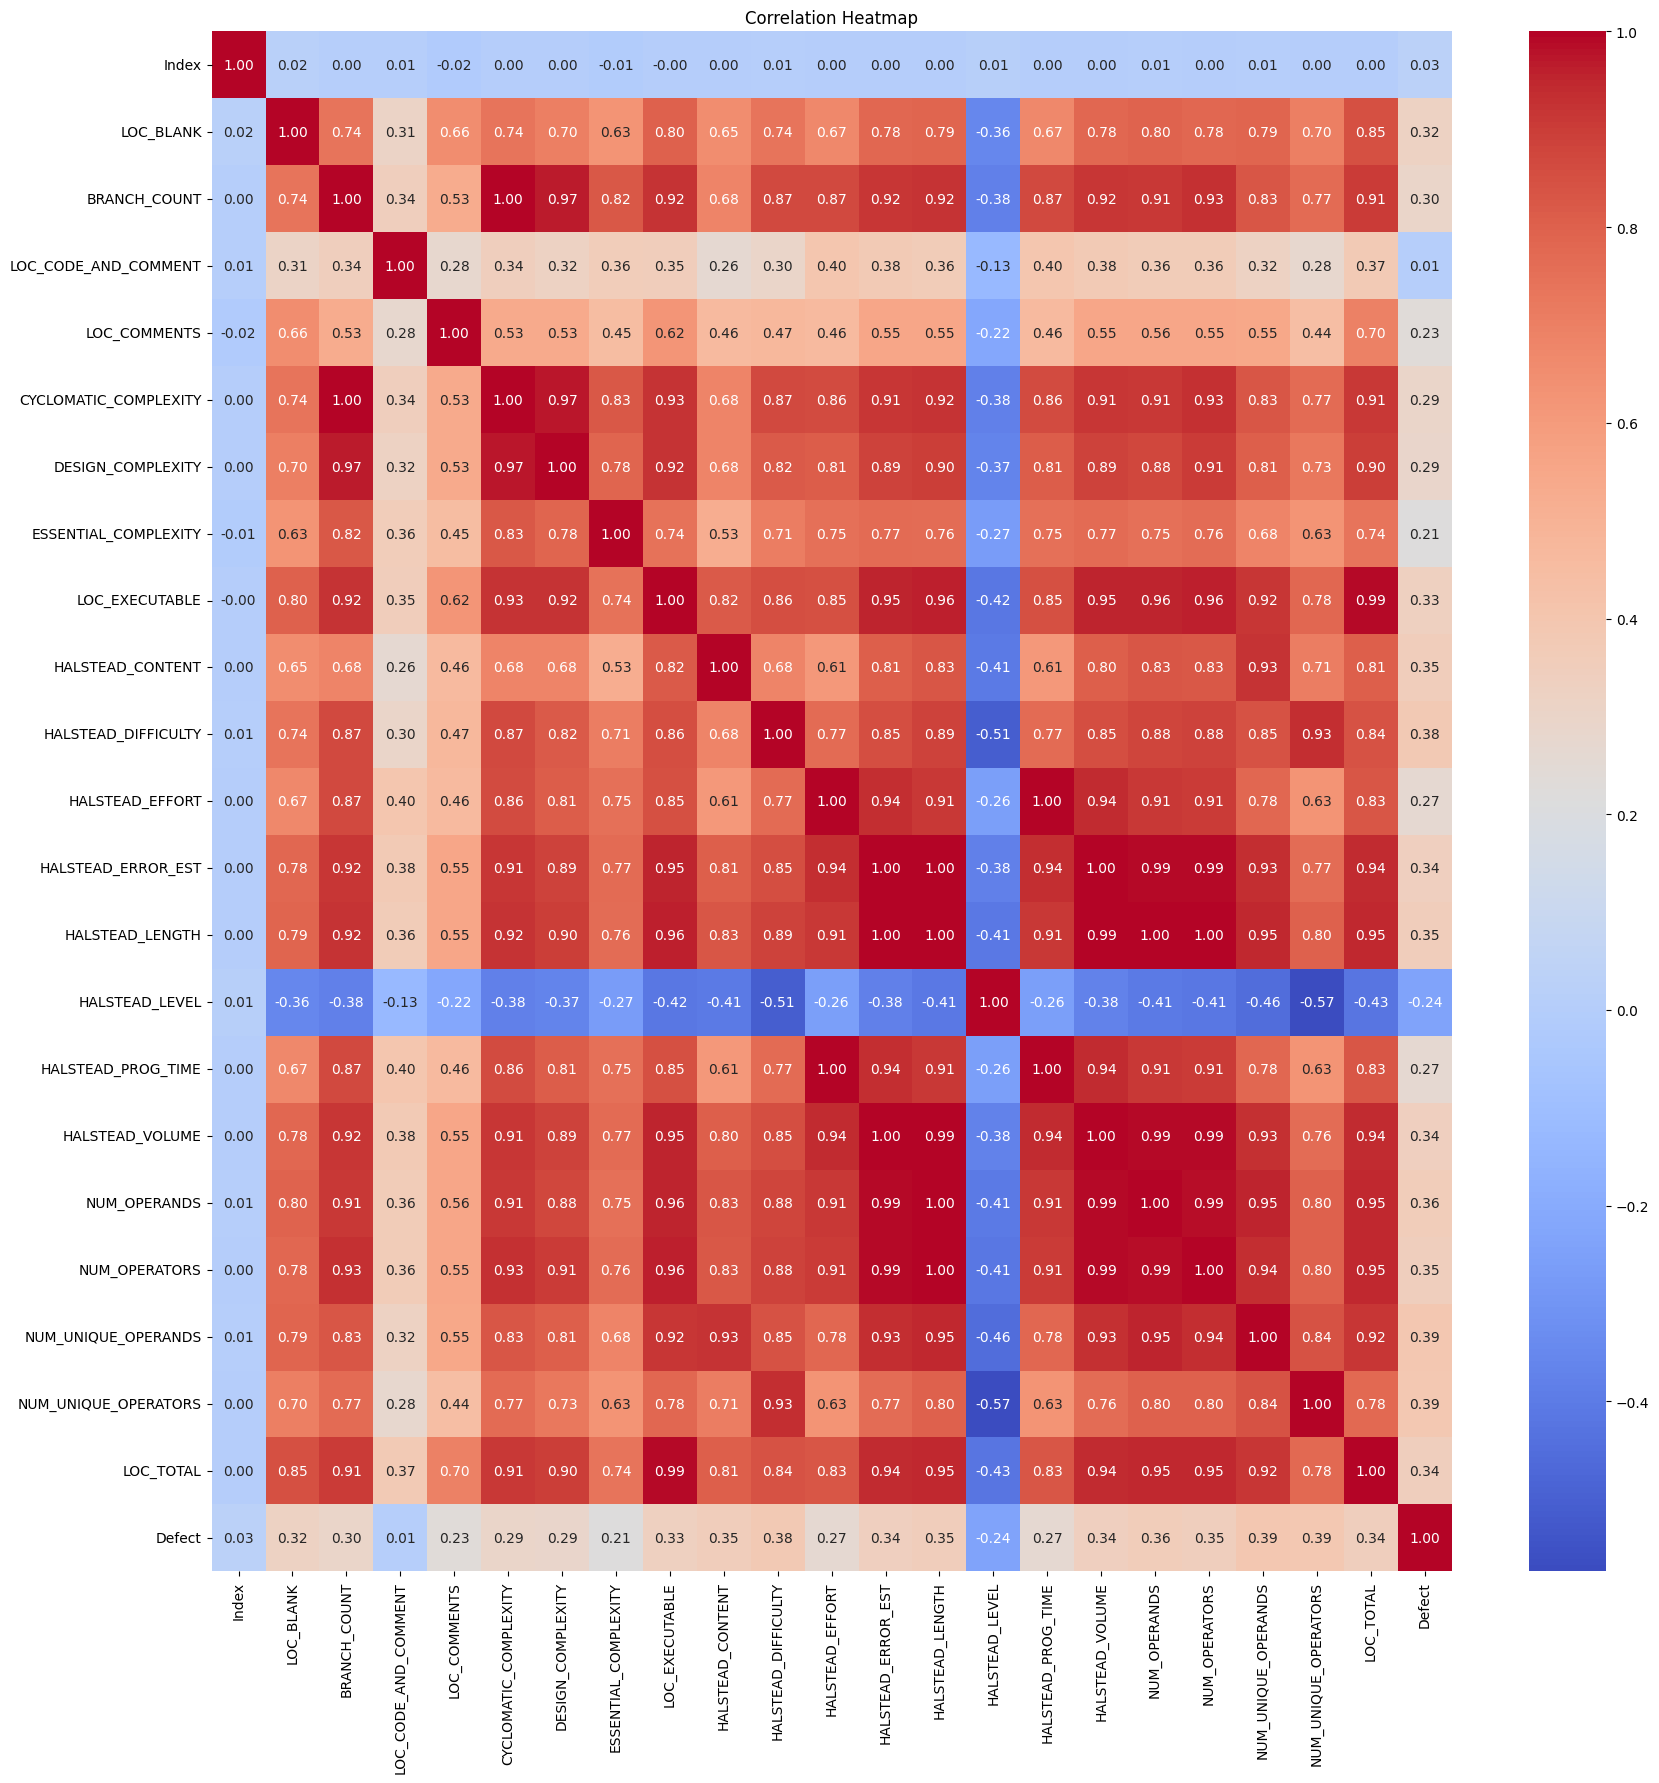

In [111]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Features correction

1. Apply Log Transformation on Each Feature:
- Log transformation is a common technique used to handle skewed distributions and reduce the variability in data. It can help stabilize the variance and make the data more normally distributed.
- This step involves applying the natural logarithm function to each feature in the dataset.
---
2. Apply Standard Scaling on Each Feature:
- Standard scaling (also known as z-score normalization) is a preprocessing technique that rescales the features to have a mean of 0 and a standard deviation of 1.
- It is important for algorithms that are sensitive to feature scaling, such as gradient descent-based algorithms and support vector machines.
- This step involves standardizing each feature so that they all have the same scale.
---
3. Use Oversampling:
- Oversampling is a technique used to address class imbalance in the dataset, where one class (e.g., defective products) is significantly underrepresented compared to another class (e.g., non-defective products).
- Oversampling involves generating synthetic samples for the minority class to balance the distribution of classes in the dataset.
- This step aims to improve the performance of the model by ensuring that it is trained on a more balanced dataset.

In [112]:
# Assigning the 'Defect' column to y, which represents the target variable
y = train_df['Defect']

# Assigning the remaining columns (excluding 'Defect' and 'Index') to X, which represents the features
X=train_df.drop(columns=['Defect','Index'])

# Assigning the columns of the test dataframe (excluding 'Index') to X_eval, which represents the features for evaluation
X_eval=test_df.drop(columns=['Index'])

In [113]:
#Iterate through each column in the train_df DataFrame
for column in train_df.columns:
    # Check if the column is not 'Index' and not 'Defect'
    if column != 'Index' and column != 'Defect':
        # Check if the column exists in X DataFrame
        if column in X.columns:
            # Apply a lambda function to each value in the column to perform a log transformation
            # Adding 1 before taking the log to avoid issues with zero values
            X[column] = X[column].apply(lambda x: log(x + 1))

        # Check if the column exists in X_eval DataFrame
        if column in X_eval.columns:
            # Apply the same transformation to the corresponding column in the X_eval DataFrame
            X_eval[column] = X_eval[column].apply(lambda x: log(x + 1))

In [114]:
scaler=StandardScaler()
cols=X.columns
X=pd.DataFrame(scaler.fit_transform(X),columns=cols)
X_eval=pd.DataFrame(scaler.transform(X_eval),columns=cols)

### Over Sampling techinque for imbalanced data:

- We import the ADASYN oversampling technique from the imbalanced-learn library. ADASYN stands for Adaptive Synthetic Sampling Approach for Imbalanced Learning.

- Defining the over sampling ration:\
ratio = 1.5: defines the oversampling ratio. In this case, it's set to 1.5, indicating that the minority class will be oversampled to have 1.5 times as many samples as the majority class after oversampling.

In [115]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1)

# Define oversampling ratio
ratio = 1.5

# Calculate the number of samples for each class after oversampling
count_0, count_1 = y_train.value_counts()
target = {0: int(ratio * count_0), 1: int(ratio * count_1)}

# Create and fit the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=target, n_jobs=-1)
X_train_over, y_train_over = adasyn.fit_resample(X_train, y_train)

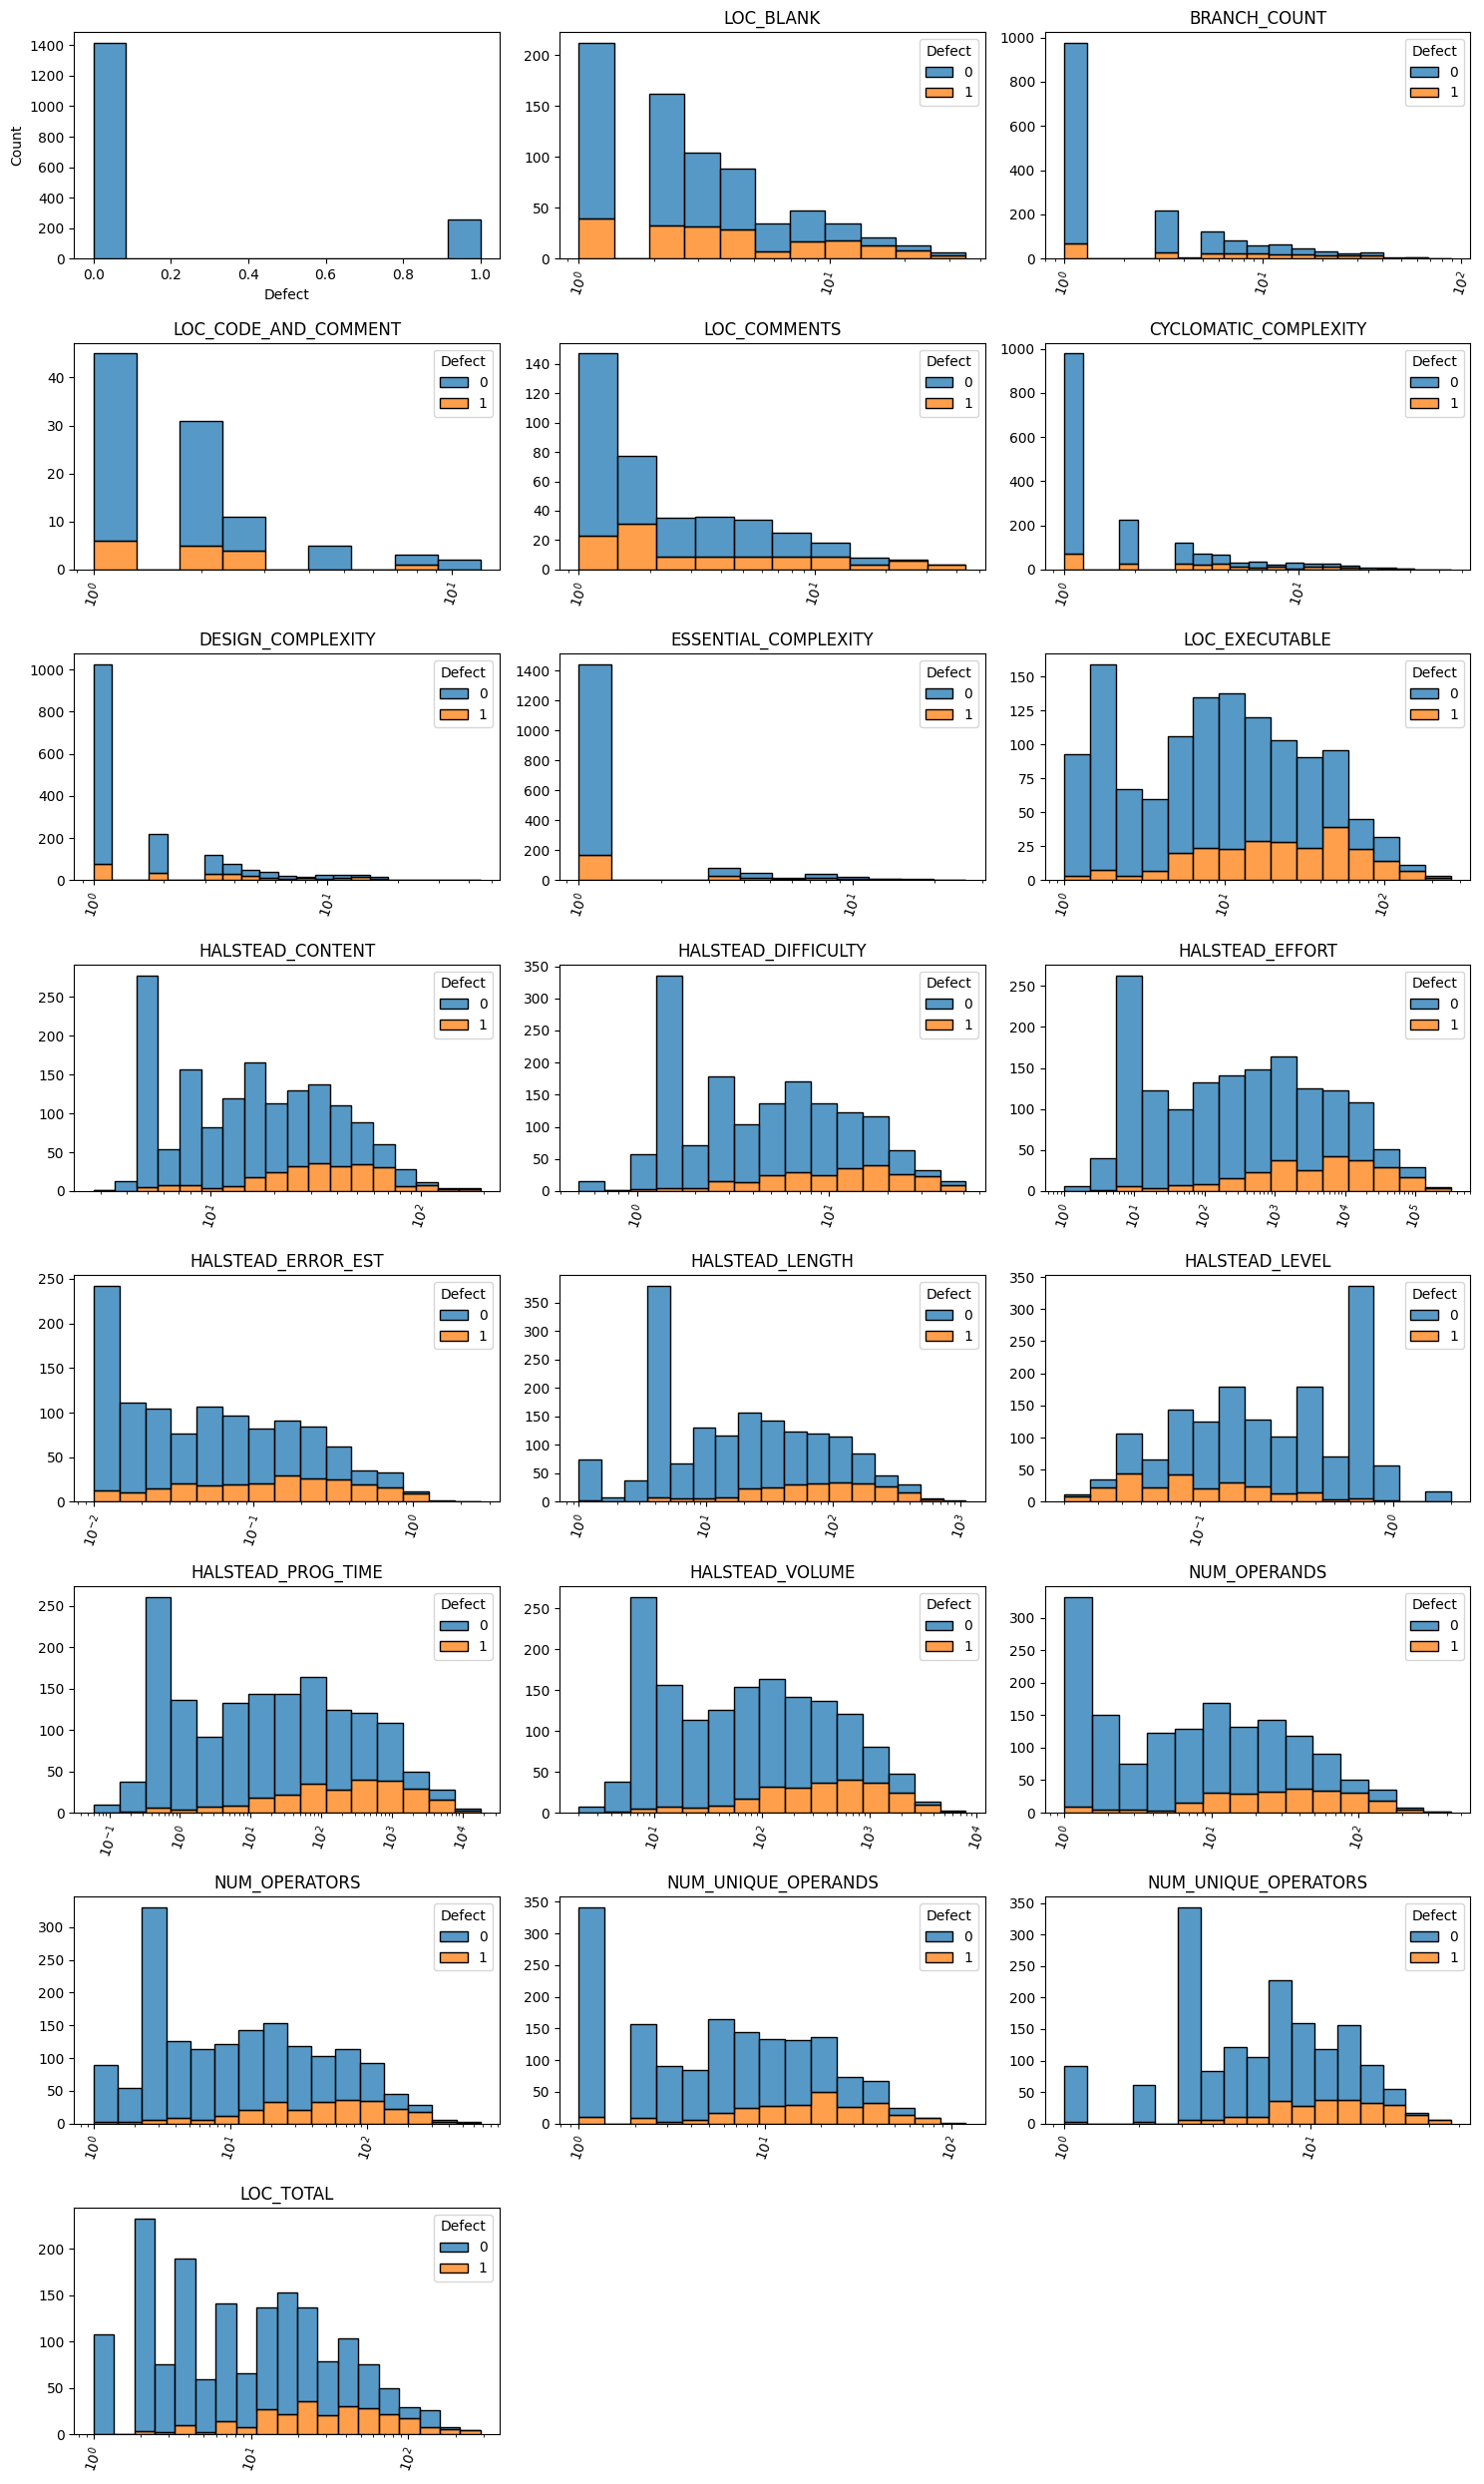

In [116]:
plt.figure(figsize=(15, 25))

# Define discrete_columns excluding 'Index' and 'Defect'
discrete_columns = [column for column in train_df.columns if column != 'Index' and column != 'Defect']

plt.subplot(8, 3, 1)
sns.histplot(data=train_df, x='Defect')

# Enumerate over discrete_columns and plot histograms
for i, column in enumerate(discrete_columns):
    plt.subplot(8, 3, i + 2)  # Adjusting subplot index to start from 2
    sns.histplot(x=train_df[column], hue=train_df['Defect'], multiple="stack", log_scale=(True, False))
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

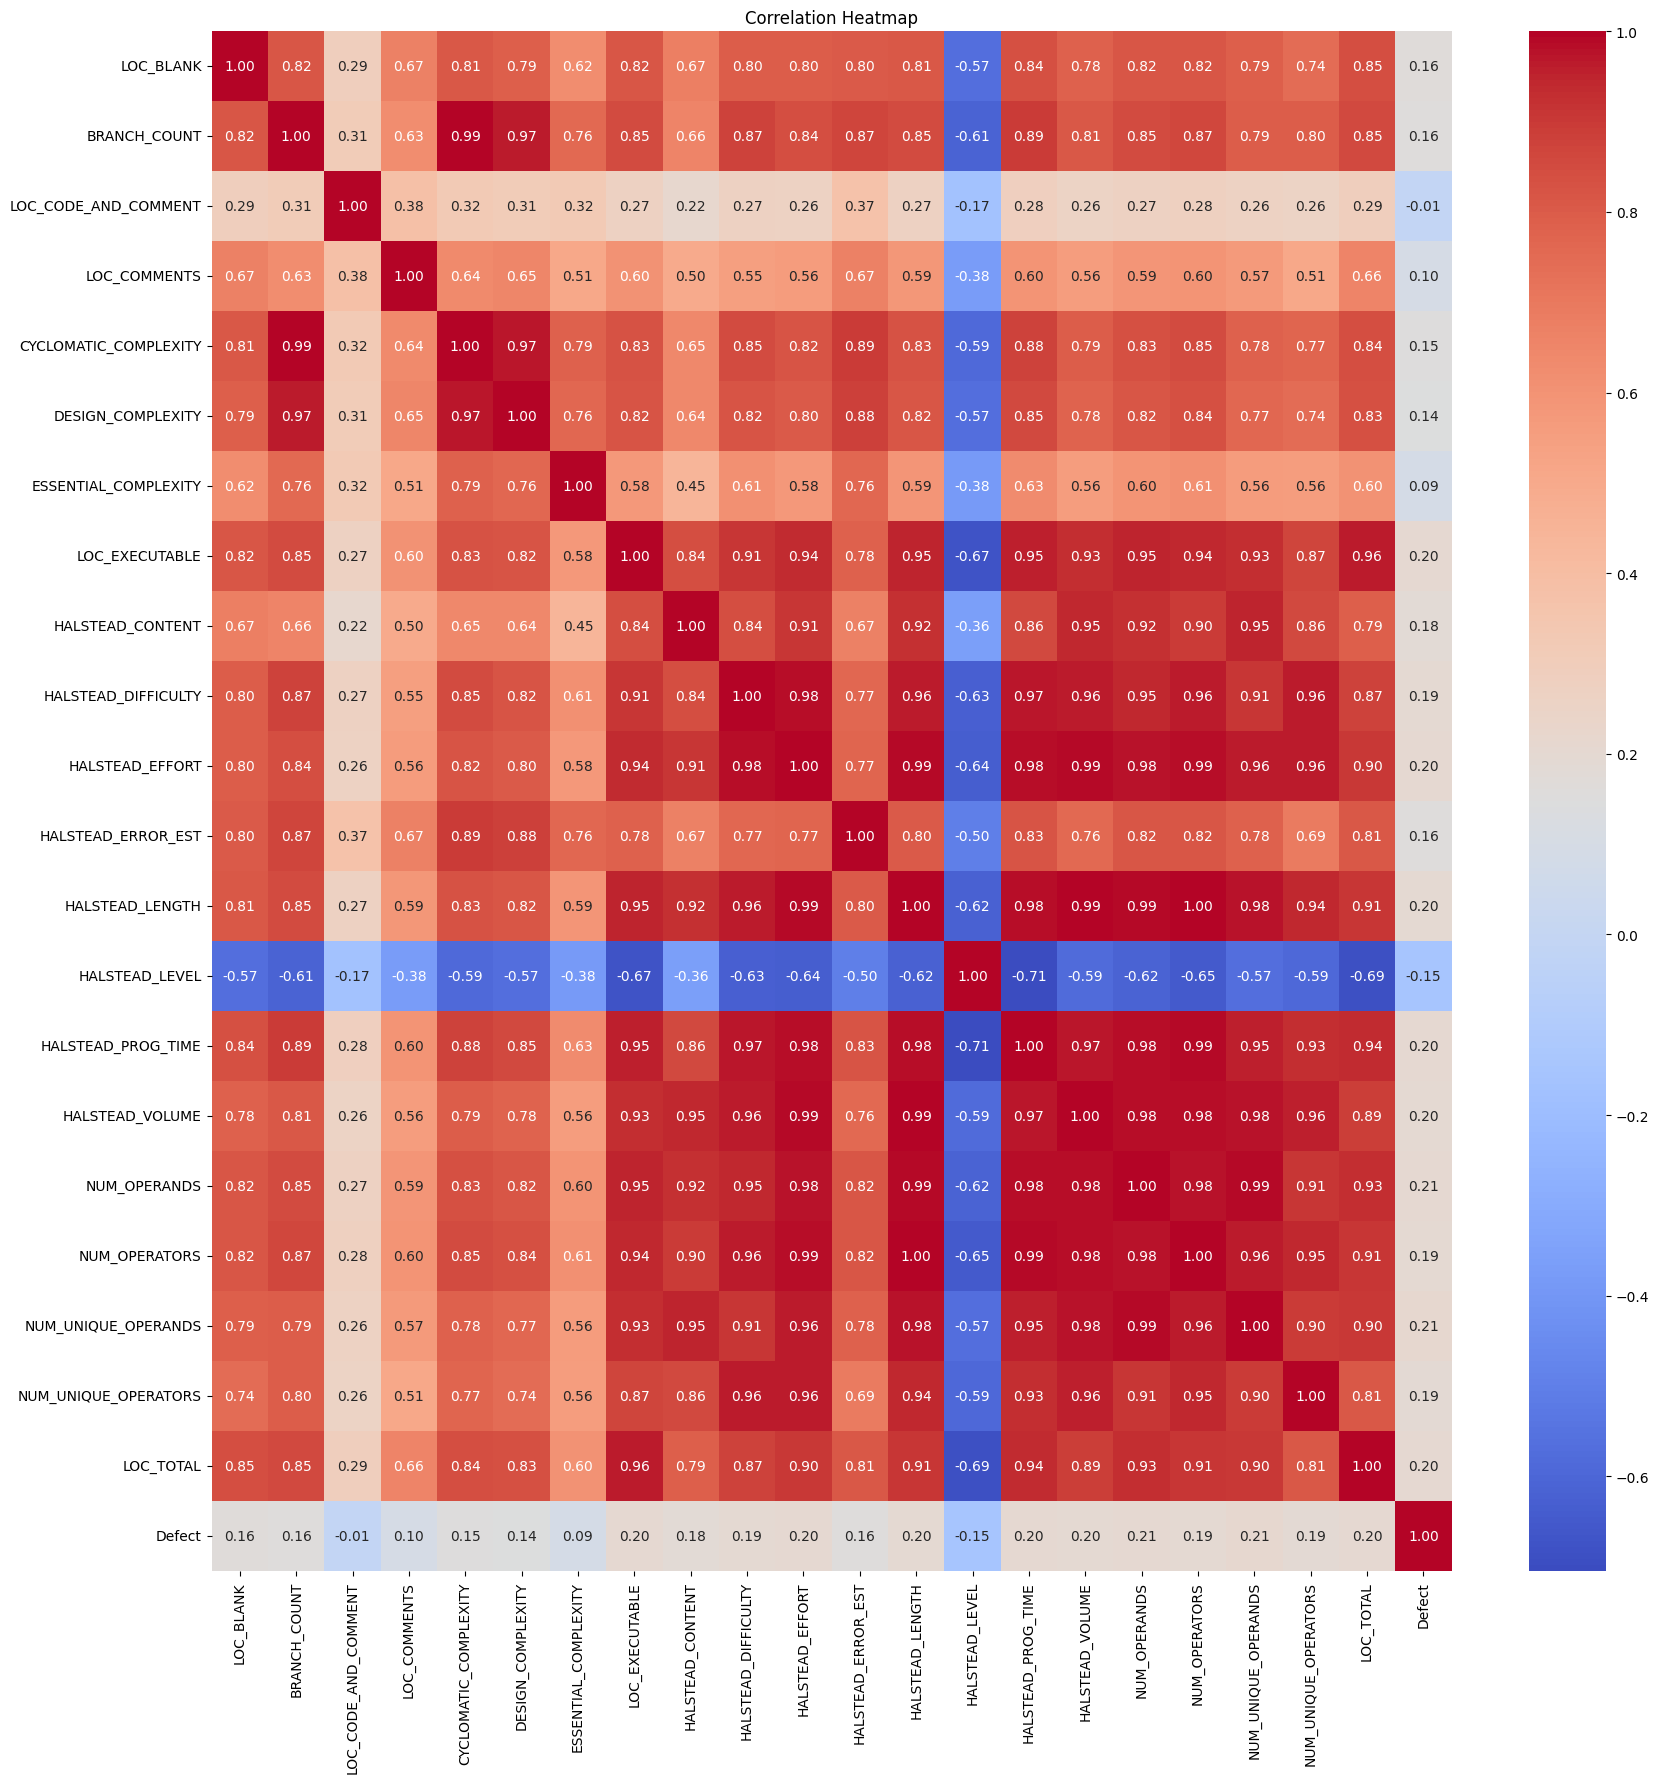

In [117]:
df = X_train_over.copy()
df['Defect']=y_train_over

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---
---
# Model Building


## Random forest classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rfc=RandomForestClassifier(n_estimators=1000,max_depth=40, random_state=0)
rfc.fit(X_train_over,y_train_over)
y_pred=rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.8067443120260022, 0.13724821084612931, 0.15476190476190477)

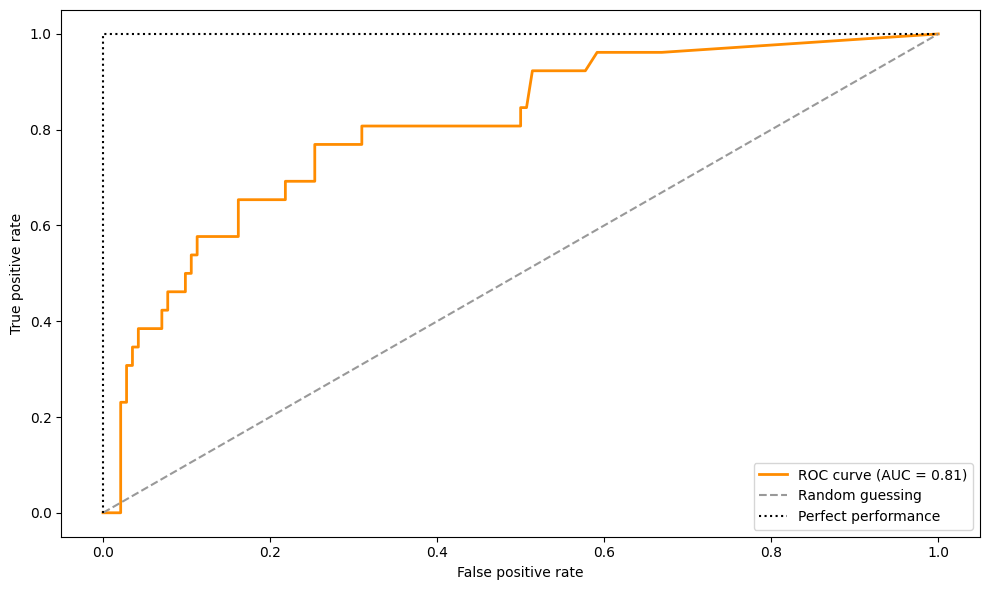

In [119]:
# Let's plot the roc_auc_score: import the necessary packages
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

---
## Extra Trees classifier

In [120]:
from sklearn.ensemble import ExtraTreesClassifier

# Let's now implement the Extra Trees classifier:
etc=ExtraTreesClassifier(n_estimators=1000,random_state=0)
etc.fit(X_train_over,y_train_over)
y_pred=etc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.825027085590466, 0.13945157207480843, 0.15476190476190477)

---
## Gradient Boosting Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

# Let's now implement the gradient boosting classifier:
gbc=GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc.fit(X_train_over,y_train_over)
y_pred=gbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.7697724810400867, 0.09887828198805244, 0.15476190476190477)

---
## Hist Gradient Boosting

In [122]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Let's now implement the hist gradient boosting classifier:
hgbc=HistGradientBoostingClassifier(max_iter=1000,max_depth=10,random_state=0)
hgbc.fit(X_train_over,y_train_over)
y_pred=hgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.7719393282773565, 0.10383017140964793, 0.15476190476190477)

---
## XGboost classifier

In [123]:
!pip install xgboost

In [124]:
import xgboost as xgb

# Let's now implement the XGboost classifier:
xgbc=xgb.XGBClassifier(n_estimators=1000,max_depth=10,random_state=0)
xgbc.fit(X_train_over,y_train_over)
y_pred=xgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.716955579631636, 0.13042524, 0.15476190476190477)

---
## LGBM classifier

In [125]:
import lightgbm as lgb

# Let's now implement the lightgbm Classifier:
lgbc=lgb.LGBMClassifier(n_estimators=1000,max_depth=10,random_state=0)
lgbc.fit(X_train_over,y_train_over)
y_pred=lgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 360, number of negative: 1897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4817
[LightGBM] [Info] Number of data points in the train set: 2257, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159504 -> initscore=-1.661925
[LightGBM] [Info] Start training from score -1.661925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

(0.7123510292524378, 0.11720268975408109, 0.15476190476190477)

---
## CatBoost classifier

In [126]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

# Let's now implement the catboost classifier:
cbc=CatBoostClassifier(n_estimators=1000,max_depth=10,random_state=0)
cbc.fit(X_train_over,y_train_over)
y_pred=cbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

Learning rate set to 0.014585
0:	learn: 0.6825593	total: 48.8ms	remaining: 48.8s
1:	learn: 0.6722167	total: 101ms	remaining: 50.5s
2:	learn: 0.6626805	total: 149ms	remaining: 49.7s
3:	learn: 0.6534944	total: 203ms	remaining: 50.7s
4:	learn: 0.6453542	total: 242ms	remaining: 48.1s
5:	learn: 0.6360169	total: 290ms	remaining: 48s
6:	learn: 0.6278295	total: 337ms	remaining: 47.8s
7:	learn: 0.6194473	total: 386ms	remaining: 47.8s
8:	learn: 0.6117914	total: 440ms	remaining: 48.4s
9:	learn: 0.6042784	total: 494ms	remaining: 48.9s
10:	learn: 0.5970257	total: 542ms	remaining: 48.7s
11:	learn: 0.5898359	total: 591ms	remaining: 48.7s
12:	learn: 0.5833210	total: 639ms	remaining: 48.5s
13:	learn: 0.5764670	total: 693ms	remaining: 48.8s
14:	learn: 0.5697531	total: 741ms	remaining: 48.6s
15:	learn: 0.5638258	total: 812ms	remaining: 49.9s
16:	learn: 0.5574062	total: 917ms	remaining: 53s
17:	learn: 0.5514878	total: 1.07s	remaining: 58.6s
18:	learn: 0.5458228	total: 1.23s	remaining: 1m 3s
19:	learn: 0.5

---
## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Let's now implement the AdaBoost classifier:
abc=AdaBoostClassifier(n_estimators=1000,algorithm="SAMME",random_state=0)
abc.fit(X_train_over,y_train_over)
y_pred=abc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

---
## StackingClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf = StackingClassifier(estimators=base_estimators,
                                  final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model
stacking_clf.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

In [130]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf_v1 = StackingClassifier(estimators=base_estimators,
                                  final_estimator=ExtraTreesClassifier(n_estimators=100, random_state=42))

# Fit the stacking model
stacking_clf_v1.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf_v1.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

ROC AUC Score: 0.8052546045503792
Mean Predictions: 0.1734069607641036
Mean True Values: 0.15476190476190477


In [131]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf_v2 = StackingClassifier(estimators=base_estimators,
                                  final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the stacking model
stacking_clf_v2.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf_v2.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

ROC AUC Score: 0.7978060671722643
Mean Predictions: 0.16478757108750752
Mean True Values: 0.15476190476190477


---
---
# Generate Predictions and Create Submission File

Since the metric of this competition is roc_auc_score, the output will be measured against predicted probabilities and not predicted class.

(ROC is a probability curve. It tells how much the model is capable of distinguishing between classes. It is measured as probability only and not as a class.)

The sample submission shows output as binary output but that should not be followed.

So, our model should use

model.predict_proba(test_data)[:, 1]

and not

model.predict(test_data)

## Predictions for Random Forest

In [ ]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [133]:
predictions.shape,np.mean(predictions),np.mean(y)

((419,), 0.13396487940484067, 0.15513126491646778)

In [134]:
# Convert predictions to DataFrame
predictions_df_rfc = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/rfc_submission.csv', index=True)

Let's try to vary the threshold...

Indeed it would make sense to put that threshold low since we are dealing with NASA data so any slight increase in the probabilities could lead to a disaster...

In [135]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.3

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0]


In [136]:
# Convert predictions to DataFrame
predictions_df_rfc_030 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc_030.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc_030.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/rfc_030_submission.csv', index=True)

Let's try for 0.35 as our threshold...

In [137]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.35

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0]


In [138]:
# Convert predictions to DataFrame
predictions_df_rfc_035 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc_035.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc_035.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/rfc_035_submission.csv', index=True)

---
---
##Predictions for Extra Trees Classifier

In [139]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.3

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0]


In [140]:
# Convert predictions to DataFrame
predictions_df_etc_030 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_etc_030.index.name = 'Index'
# Save predictions to CSV
predictions_df_etc_030.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/etc_030_submission.csv', index=True)

Let's try for threshold = 0.15

In [141]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.1

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1]


In [142]:
# Convert predictions to DataFrame
predictions_df_etc_015 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_etc_015.index.name = 'Index'
# Save predictions to CSV
predictions_df_etc_015.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/etc_01_submission.csv', index=True)

Let's try for threshold = 0.20

In [143]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0]


---
---
## Predictions for Catboost Classifier

In [144]:
# Make predictions
predictions = cbc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [145]:
# Convert predictions to DataFrame
predictions_df_cbc = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_cbc.index.name = 'Index'
# Save predictions to CSV
predictions_df_cbc.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/cbc_submission.csv', index=True)

---
---
## Predictions for our Stacking Classifier:

In [146]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.15

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0]


In [147]:
# Convert predictions to DataFrame
predictions_df_stacking_015 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_015.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_015.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stacking_015_submission.csv', index=True)

In [148]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0]


In [149]:
# Convert predictions to DataFrame
predictions_df_stacking_020 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_020.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_020.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/stacking_020_submission.csv', index=True)

In [150]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.25

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0]


In [151]:
# Convert predictions to DataFrame
predictions_df_stacking_025 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_025.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_025.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stacking_025_submission.csv', index=True)

In [152]:
# Make predictions
predictions = stacking_clf_v1.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0]


In [153]:
# Convert predictions to DataFrame
predictions_df_stackingv1_020 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stackingv1_020.index.name = 'Index'
# Save predictions to CSV
predictions_df_stackingv1_020.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stackingv1_020_submission.csv', index=True)